In [ ]:
import io
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df=df.drop('CustomerID',axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


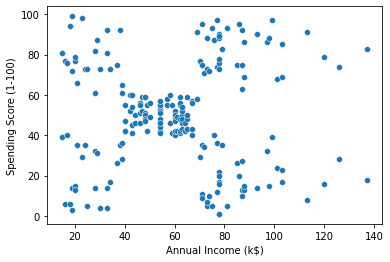

In [ ]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [ ]:
from scipy.cluster import hierarchy

In [ ]:
Z = hierarchy.linkage(df[['Annual Income (k$)','Spending Score (1-100)']], method='weighted')

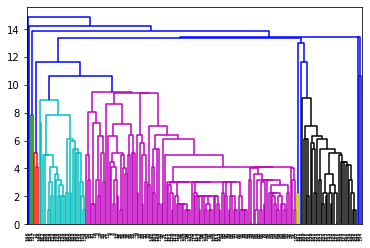

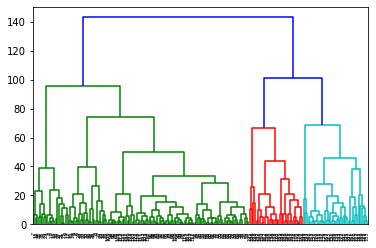

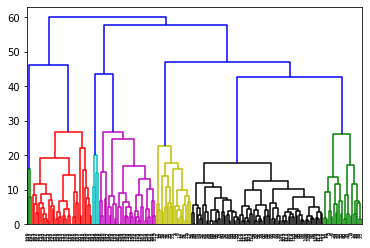

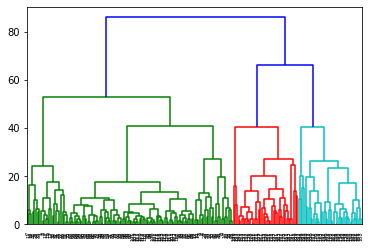

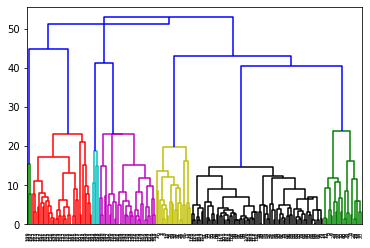

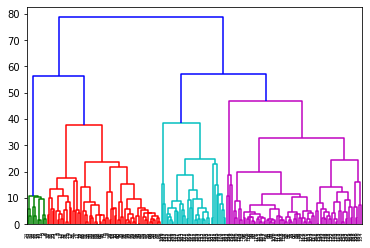

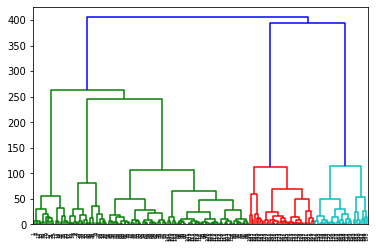

In [ ]:
methods=['single','complete','average','weighted','centroid','median','ward']

for method in methods:
  Z = hierarchy.linkage(df[['Annual Income (k$)','Spending Score (1-100)']], method=method)
  plt.figure()
  dn = hierarchy.dendrogram(Z,distance_sort='descending',
            show_leaf_counts=True)

In [ ]:
data = df.iloc[:, 3:5]

In [ ]:
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
CLSTR=KMeans(n_clusters=5)
CLSTR.fit_predict(data)

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

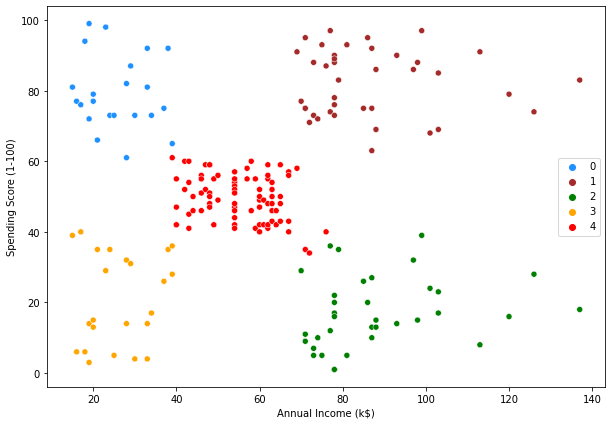

In [ ]:
color_dict = dict({1:'brown',
                  2:'green',
                  3: 'orange',
                  4: 'red',
                   0: 'dodgerblue'})
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)',hue=CLSTR.labels_,palette=color_dict)

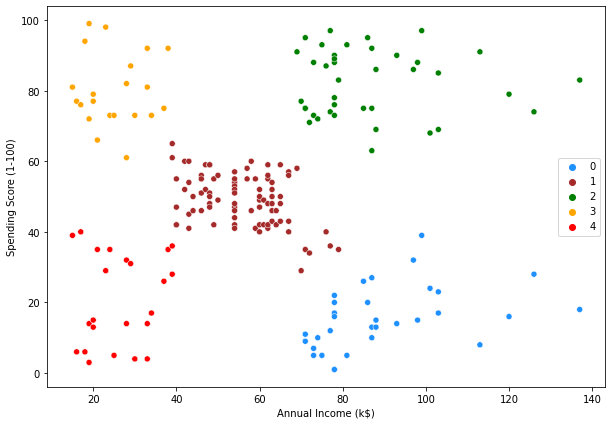

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)',hue=cluster.labels_,palette=color_dict)

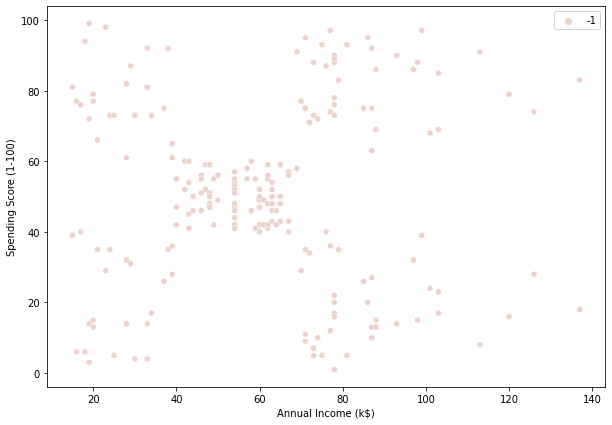

In [ ]:
from sklearn.cluster import DBSCAN
cluster1 = DBSCAN(eps=0.3, min_samples=5)
cluster1.fit_predict(data)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)',hue=cluster1.labels_)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
temp=[]
for k in range(1,11,1):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(data)
  temp.append(kmeans.inertia_)
  

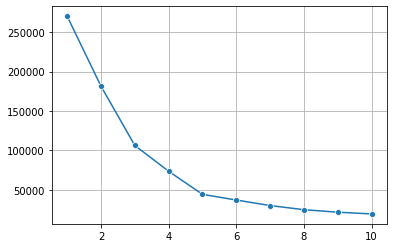

In [ ]:
sns.lineplot(x=range(1,11,1),y=temp,marker='o')
plt.grid()
plt.show()

In [ ]:
temp=[]
for k in range(1,11,1):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(data)
  temp.append(kmeans.inertia_)
  